# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [20]:
import pandas as pd

dat = pd.read_csv('datasets/sr_aufg_2_13.txt', sep='\s+', decimal=',', header=None, names=['Jahr', 'Einwohner'])
#data.head(5)
dat

,Jahr,Einwohner
0,1790,3.929214
1,1800,5.308483
2,1810,7.239881
3,1820,9.638453
4,1830,12.866020
5,1840,17.069453
6,1850,23.191876
7,1860,31.443321
8,1870,39.818449
9,1880,50.189209


## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

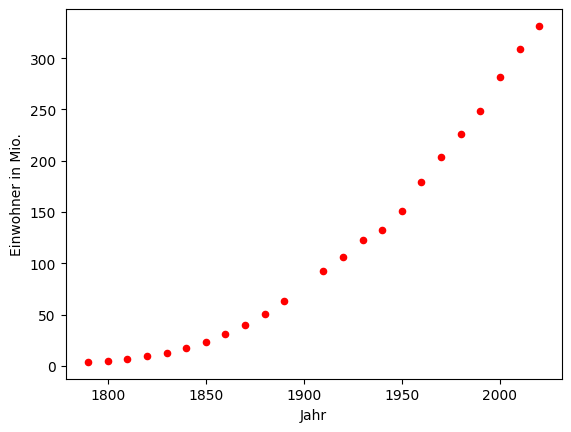

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x = dat['Jahr']
y = dat['Einwohner']

dat.plot(kind='scatter', x='Jahr', y='Einwohner', color='red')
plt.xlabel('Jahr')
plt.ylabel('Einwohner in Mio.')
plt.show()

## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

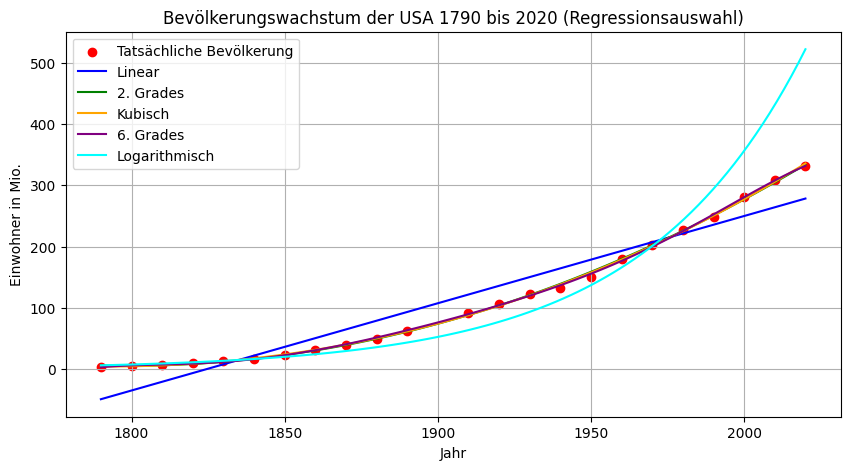

,Regressionstyp,Geschätzte Koeffizienten,Bestimmtheitsmaß (R²)
0,Lineare Funktion,327.27x + -48.81,0.924853
1,Polynom 2. Grades,355.43x^2 + -27.83x + 6.30,0.999255
2,Polynom 3. Grades,39.79x^3 + 295.66x^2 + -4.37x + 4.55,0.999323
3,Polynom 6. Grades,-4262.17x^6 + 12252.25x^5 + -13110.22x^4 + 644...,0.999586
4,Logarithmisch,exp(1.87) * exp(4.39x),0.748601


In [53]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# Assuming dat['Jahr'] and dat['Einwohner'] are your data
x = dat['Jahr']
y = dat['Einwohner']

# Fit a linear regression line
a, b = np.polyfit(x, y, 1)

# Fit a polynomial of the 2nd degree
coefficients_quad = np.polyfit(x, y, 2)

# Fit a polynomial of the 3rd degree
coefficients_cubic = np.polyfit(x, y, 3)

# Fit a polynomial of the 6th degree
coefficients_sixth = np.polyfit(x, y, 6)

# Fit a logarithmic function
coefficients_log = np.polyfit(x, np.log(y), 1)

# Generate x values for the polynomial curves
x_values = np.linspace(min(x), max(x), 100)

# Generate polynomial functions using the coefficients
polynomial_func_quad = np.poly1d(coefficients_quad)
polynomial_func_cubic = np.poly1d(coefficients_cubic)
polynomial_func_sixth = np.poly1d(coefficients_sixth)
# Generate log function using the coefficients
logarithmic_func = np.poly1d(coefficients_log)
logarithmic_func = lambda x: np.exp(coefficients_log[1]) * np.exp(coefficients_log[0]*x)

# Plot all functions in one plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='Tatsächliche Bevölkerung')
plt.plot(x_values, a*x_values + b, color='blue', label='Linear')
plt.plot(x_values, polynomial_func_quad(x_values), color='green', label='2. Grades')
plt.plot(x_values, polynomial_func_cubic(x_values), color='orange', label='Kubisch')
plt.plot(x_values, polynomial_func_sixth(x_values), color='purple', label='6. Grades')
plt.plot(x_values, logarithmic_func(x_values), color='cyan', label='Logarithmisch')
plt.xlabel('Jahr')
plt.ylabel('Einwohner in Mio.')
plt.title('Bevölkerungswachstum der USA 1790 bis 2020 (Regressionsauswahl)')
plt.legend()
plt.grid(True)
plt.show()


# Standardisieren der Eingangswerte (Jahreszahlen)
x_normalized = (x - x.min()) / (x.max() - x.min())

# Fit der Regressionskurven und Berechnung des Bestimmtheitsmaßes
results = []

# Lineare Anpassung
coeff_linear = np.polyfit(x_normalized, y, 1)
y_pred_linear = np.polyval(coeff_linear, x_normalized)
residuals_linear = y - y_pred_linear
ssr_linear = np.sum(residuals_linear ** 2)
sst_linear = np.sum((y - np.mean(y)) ** 2)
r_squared_linear = 1 - (ssr_linear / sst_linear)

results.append(['Lineare Funktion', f'{coeff_linear[0]:.2f}x + {coeff_linear[1]:.2f}', r_squared_linear])

# Quadratische Anpassung
coeff_quad = np.polyfit(x_normalized, y, 2)
y_pred_quad = np.polyval(coeff_quad, x_normalized)
residuals_quad = y - y_pred_quad
ssr_quad = np.sum(residuals_quad ** 2)
sst_quad = np.sum((y - np.mean(y)) ** 2)
r_squared_quad = 1 - (ssr_quad / sst_quad)

results.append(['Polynom 2. Grades', f'{coeff_quad[0]:.2f}x^2 + {coeff_quad[1]:.2f}x + {coeff_quad[2]:.2f}', r_squared_quad])

# Kubische Anpassung
coeff_cubic = np.polyfit(x_normalized, y, 3)
y_pred_cubic = np.polyval(coeff_cubic, x_normalized)
residuals_cubic = y - y_pred_cubic
ssr_cubic = np.sum(residuals_cubic ** 2)
sst_cubic = np.sum((y - np.mean(y)) ** 2)
r_squared_cubic = 1 - (ssr_cubic / sst_cubic)

results.append(['Polynom 3. Grades', f'{coeff_cubic[0]:.2f}x^3 + {coeff_cubic[1]:.2f}x^2 + {coeff_cubic[2]:.2f}x + {coeff_cubic[3]:.2f}', r_squared_cubic])

# 6. Grad Polynomialanpassung
coeff_sixth = np.polyfit(x_normalized, y, 6)
y_pred_sixth = np.polyval(coeff_sixth, x_normalized)
residuals_sixth = y - y_pred_sixth
ssr_sixth = np.sum(residuals_sixth ** 2)
sst_sixth = np.sum((y - np.mean(y)) ** 2)
r_squared_sixth = 1 - (ssr_sixth / sst_sixth)

results.append(['Polynom 6. Grades', f'{coeff_sixth[0]:.2f}x^6 + {coeff_sixth[1]:.2f}x^5 + {coeff_sixth[2]:.2f}x^4 + {coeff_sixth[3]:.2f}x^3 + {coeff_sixth[4]:.2f}x^2 + {coeff_sixth[5]:.2f}x + {coeff_sixth[6]:.2f}', r_squared_sixth])

# Logarithmische Anpassung
coeff_log = np.polyfit(x_normalized, np.log(y), 1)
y_pred_log = np.polyval(coeff_log, x_normalized)
residuals_log = y - np.exp(y_pred_log)
ssr_log = np.sum(residuals_log ** 2)
sst_log = np.sum((y - np.mean(y)) ** 2)
r_squared_log = 1 - (ssr_log / sst_log)

results.append(['Logarithmisch', f'exp({coeff_log[1]:.2f}) * exp({coeff_log[0]:.2f}x)', r_squared_log])

# Erstellen der Ergebnistabelle
results_df = pd.DataFrame(results, columns=['Regressionstyp', 'Geschätzte Koeffizienten', 'Bestimmtheitsmaß (R²)'])

results_df



## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

In [ ]:
##Das Polynom 6. Grades ist hier am besten geeignet, da es das Wachstum am genauesten modelliert. (Auch zu sehen am Bestimtheitsmaß, Höchter Wert im Vergleich zu den Anderen.)

## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

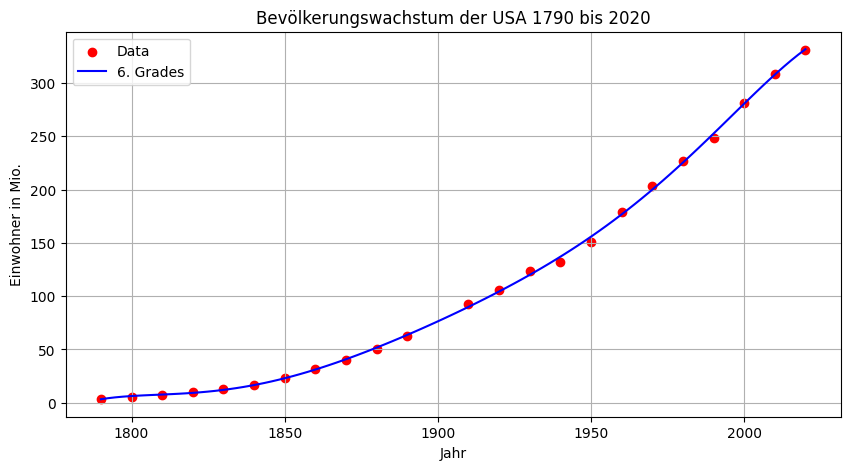

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x_values, polynomial_func_sixth(x_values), color='blue', label='6. Grades')
plt.xlabel('Jahr')
plt.ylabel('Einwohner in Mio.')
plt.title('Bevölkerungswachstum der USA 1790 bis 2020')
plt.legend()
plt.grid(True)
plt.show()


## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [55]:
# prognosis for 2030 (using the coefficents of the polynomial 6th degree)
year_2030 = 2030
population_2030 = np.polyval(coefficients_sixth, year_2030)

print("Prognose für das Jahr 2030:", population_2030, "Millionen Einwohner")

Prognose für das Jahr 2030: 348.5801787376404 Millionen Einwohner


## Erläuterung zum Vorgehen
Das Polynom 6. Grades spiegelt die Bevölkerungsentwicklung aufgrund seiner Flexibiliät am genauesten wider. Somit ist es auch am besten für eine Prognose geeignet. Wenn man die Koeffizenten nimmt und bis ins Jahr 2030 weiterberchnen lässt, dann ergibt sich hier eine relativ genaue Vorhersage. Betrachtet man beispielsweise die Enticklung im Zeitraum 2010 bis 2020, mit einem Wachstum von ca. 23 Millionen, scheint ein weiteres Wachstum von den errechneten ca. 17 Mio. bis 2030 nicht unrealistisch. Denn tendenziell flacht das Wachstum eher wieder ab, was auch bereits an der Regressionskurve erkennbar ist. (Bei Betrachtung der letzten 10-Jahreszeiträume)